In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from UoI_Lasso import UoI_Lasso

from ret1_utils import Retina

%matplotlib inline

In [33]:
fits = h5py.File('fits.h5', 'a')

In [35]:
fits.close()

In [10]:
dataset = fits.create_group('20080516_R1.mat')

In [37]:
retina.n_cells

7

In [2]:
retina = Retina(
    data_path='data/20080516_R1.mat',
    random_path='data/ran1.bin'
)

In [34]:
fits['20080516_R1/0/0/lasso/strf'] = lasso_strf
fits['20080516_R1/0/0/lasso/intercepts'] = lasso_intercept
fits['20080516_R1/0/0/lasso/r2s'] = lasso_r2s
fits['20080516_R1/0/0/lasso/bics'] = lasso_bics
fits['20080516_R1/0/0/lasso/aics'] = lasso_aics
fits['20080516_R1/0/0/lasso'].attrs['window_length'] = 0.33

In [27]:
fits.close()

In [3]:
# uoi lasso
strf, intercept, r2s, bics, aics = retina.calculate_strf_for_neurons(
    method='UoILasso', 
    recording_idx=0, 
    window_length=0.33,
    cells=0,
    return_scores=True,
    estimation_score='AIC'
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [14]:
lasso_strf, lasso_intercept, lasso_r2s, lasso_bics, lasso_aics = retina.calculate_strf_for_neurons(
    method='Lasso', 
    recording_idx=0, 
    window_length=0.33,
    cells=0,
    return_scores=True,
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [38]:
lasso_strf2, lasso_intercept2, lasso_r2s2, lasso_bics2, lasso_aics2 = retina.calculate_strf_for_neurons(
    method='Lasso', 
    recording_idx=1, 
    window_length=0.33,
    cells=0,
    return_scores=True,
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


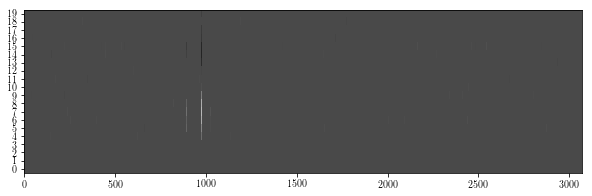

In [39]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(lasso_strf2, cmap='gray')
ax.set_aspect('auto')
ax.set_yticks(np.arange(strf.shape[0]))
ax.tick_params(labelsize=10)
#plt.savefig('aic.pdf')

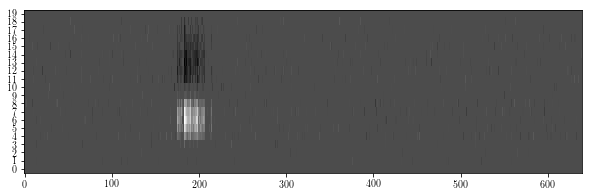

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(lasso_strf, cmap='gray')
ax.set_aspect('auto')
ax.set_yticks(np.arange(strf.shape[0]))
ax.tick_params(labelsize=10)

In [62]:
print(np.max(strf))
print(np.max(lasso_strf))

1.05758692825475e-06
9.591167327016592e-07


In [61]:
print(np.min(lasso_strf))
print(np.min(strf))

-4.059859293192858e-07
-5.019560944674595e-07


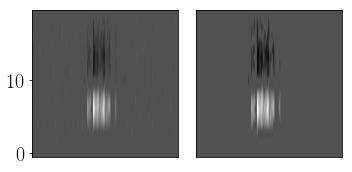

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))
axes[0].imshow(lasso_strf, vmin=-5e-07, vmax=1.06e-6, interpolation='spline36')
axes[1].imshow(strf, vmin=-5e-07, vmax=1.06e-6, interpolation='spline36')
axes[0].set_xlim([100, 300])
axes[1].set_xlim([100, 300])
axes[0].set_aspect('auto')
axes[1].set_aspect('auto')
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.tight_layout()

In [17]:
np.count_nonzero(strf)

280

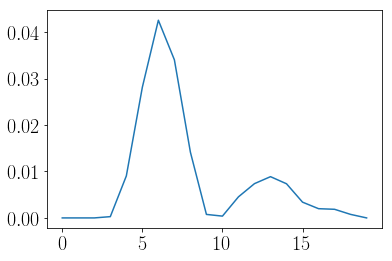

In [18]:
plt.plot(r2s)


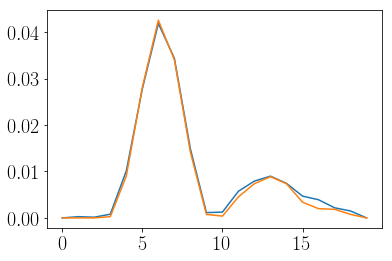

In [20]:
plt.plot(lasso_r2s)
plt.plot(r2s)

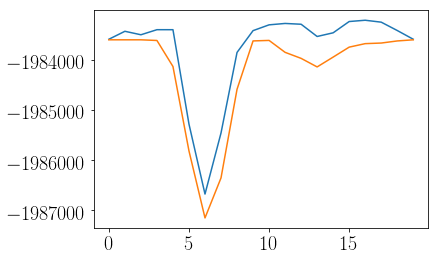

In [21]:
plt.plot(lasso_bics)
plt.plot(bics)

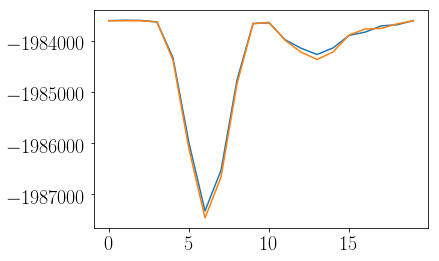

In [22]:
plt.plot(lasso_aics)
plt.plot(aics)